In [20]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.sparse as sps
from scipy import sparse
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 
from matplotlib.pyplot import MultipleLocator
# import statsmodels.api as sm
# from nilearn import image, surface, plotting, datasets
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [2]:
_ = np.array([0, 2, 12, 14, 16, 18, 20, 22, 24, 26, 29, 31, 33, 35, 37, 39, 41, 43, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 4, 5, 6, 7, 8, 9, 10, 11, 28, 45])
# read the fiber name
l_idx = [1,3,13,15,17,19,25,27,30,32,36,38,40,42,44,47,49,51,53,55,57,59,61,63,65,67,69,71]
r_idx = [2,4,14,16,18,24,26,28,31,35,37,39,41,43,45,48,50,52,54,56,58,60,62,64,66,68,70,72]
m_idx = [4,5,6,7,8,9,10,11]
l_idx = np.array(l_idx)
r_idx = np.array(r_idx)
m_idx = np.array(m_idx)
l_idx = l_idx-1
r_idx = r_idx-1
label_f = open('/n02dat01/users/dyli/Grad_data/support_data/fiber_name_ori_nonum_nohemi.txt', 'r')
label_name = label_f.readlines()
label_name = [' '.join([i.strip() for i in price.strip().split('\n')]) for price in label_name]
label_name_lm = [label_name[l_idx[i]] for i in range(len(l_idx))] + [label_name[m_idx[i]] for i in range(len(m_idx))]
print(f'the number of fiber: {len(label_name_lm)}')

new_fiber_idx = []
for fi,ff in enumerate(_):
    if ff in list(l_idx)+list(m_idx): new_fiber_idx.append(fi)
new_fiber_idx = np.array(new_fiber_idx)
print(new_fiber_idx.shape)

the number of fiber: 36
(36,)


In [3]:
# the medial wall
dirc_L = '/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

In [4]:
TaskList = ['EMOTION-cope1','EMOTION-cope2','EMOTION-cope3',
            'GAMBLING-cope1','GAMBLING-cope2','GAMBLING-cope3',
            'LANGUAGE-cope1','LANGUAGE-cope2','LANGUAGE-cope4',
            'MOTOR-cope1','MOTOR-cope2','MOTOR-cope3','MOTOR-cope4','MOTOR-cope5','MOTOR-cope6','MOTOR-cope7','MOTOR-cope8','MOTOR-cope9','MOTOR-cope10','MOTOR-cope11','MOTOR-cope12','MOTOR-cope13',
            'RELATIONAL-cope1','RELATIONAL-cope2','RELATIONAL-cope4',
            'SOCIAL-cope1','SOCIAL-cope2','SOCIAL-cope6',
            'WM-cope1','WM-cope2','WM-cope3','WM-cope4','WM-cope5','WM-cope6','WM-cope7','WM-cope8','WM-cope9',
            'WM-cope10','WM-cope11','WM-cope15','WM-cope16','WM-cope17','WM-cope18','WM-cope19','WM-cope20','WM-cope21','WM-cope22',
            ]

In [5]:
TaskName = ['EMOTION-FACES','EMOTION-SHAPES','EMOTION-FACES-SHAPES',
            'GAMBLING-PUNISH','GAMBLING-REWARD','GAMBLING-PUNISH-REWARD',
            'LANGUAGE-MATH','LANGUAGE-STORY','LANGUAGE-STORY-MATH',
            'MOTOR-CUE','MOTOR-LF','MOTOR-LH','MOTOR-RF','MOTOR-RH','MOTOR-T','MOTOR-AVG','MOTOR-CUE-AVG','MOTOR-LF-AVG','MOTOR-LH-AVG','MOTOR-RF-AVG','MOTOR-RH-AVG','MOTOR-T-AVG',
            'RELATIONAL-MATCH','RELATIONAL-REL','RELATIONAL-REL-MATCH',
            'SOCIAL-RANDOM','SOCIAL-TOM','SOCIAL-TOM-RANDOM',
            'WM-2BK_BODY','WM-2BK_FACE','WM-2BK_PLACE','WM-2BK_TOOL','WM-0BK_BODY','WM-0BK_FACE','WM-0BK_PLACE','WM-0BK_TOOL','WM-2BK',
            'WM-0BK','WM-2BK-0BK','WM-BODY','WM-FACE','WM-PLACE','WM-TOOL','WM-BODY-AVG','WM-FACE-AVG','WM-PLACE-AVE','WM-TOOL-AVE',
            ]

In [6]:
PlotName = ['EMOTION-FACES-SHAPES',
            'GAMBLING-REWARD',
            'LANGUAGE-STORY-MATH',
            'MOTOR-AVG',
            'RELATIONAL-REL',
            'SOCIAL-TOM',
            'WM-2BK',
            ]

In [7]:
namelist = [
 '100307', '100408', '101107', '101309', '101915', '103111', '103414', '103818', '105014', '105115', 
 '106016', '108828', '110411', '111312', '111716', '113619', '113922', '114419', '115320', '116524', 
 '117122', '118528', '118730', '118932', '120111', '122317', '122620', '123117', '123925', '124422', 
 '125525', '126325', '127630', '127933', '128127', '128632', '129028', '130013', '130316', '131217', 
 '131722', '133019', '133928', '135225', '135932', '136833', '138534', '139637', '140925', '144832', 
 '146432', '147737', '148335', '148840', '149337', '149539', '149741', '151223', '151526', '151627', 
 '153025', '154734', '156637', '159340', '160123', '161731', '162733', '163129', '176542', '178950', 
 '188347', '189450', '190031', '192540', '196750', '198451', '199655', '201111', '208226', '211417', 
 '211720', '212318', '214423', '221319', '239944', '245333', '280739', '298051', '366446', '397760', 
 '414229', '499566', '654754', '672756', '751348', '756055', '792564', '856766', '857263', '899885', 
 ]

In [8]:
def GAMMA_my(data):
    from sklearn.mixture import GaussianMixture
    from scipy.stats import gamma

    # 使用 GaussianMixture 拟合数据
    gmm = GaussianMixture(n_components=2)  # 一个高斯分布和一个Gamma分布
    gmm.fit(data.reshape(-1, 1))

    # 获取每个分布的均值和方差
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    print(means, variances)

    # 正激活阈值和负激活阈值分别设定为两个Gamma分布的中位数
    gamma1_mean = means[variances.argmax()]

    # 对于Gamma分布，中位数等于shape参数乘以尺度参数的自然对数
    gamma_threshold = gamma.ppf(0.5, a=2, scale=gamma1_mean/2)

    return gamma_threshold

def PeakThr_my(FPM_noMedialWall, thr):
    from scipy.stats import gaussian_kde

    # 找到概率密度分布的峰值，选择峰值右侧 5% 区间的端点作为阈值，借此去掉值较小的脑区
    density = gaussian_kde(FPM_noMedialWall)
    x_vals = np.linspace(min(FPM_noMedialWall), max(FPM_noMedialWall), num=2000)
    density_vals = density(x_vals)
    peak_idx = np.argmax(density_vals)
    q = lambda x : x if x > x_vals[peak_idx+int(2000*thr/100)] else 0
    FPM_noMedialWall_thr = np.array([q(FPM_noMedialWall[i]) for i in range(FPM_noMedialWall.shape[0])])

    return FPM_noMedialWall_thr

def normalization_my(x:np.ndarray):
    # x: (29696,)
    x_pos = x.copy()
    x_pos[x<0] = 0
    x_pos = x_pos / np.max(x_pos)

    x_neg = x.copy()
    x_neg[x>0] = 0
    x_neg = -1 *x_neg / np.min(x_neg)

    return x_neg + x_pos

# Figure S8.

**Whole Brain**

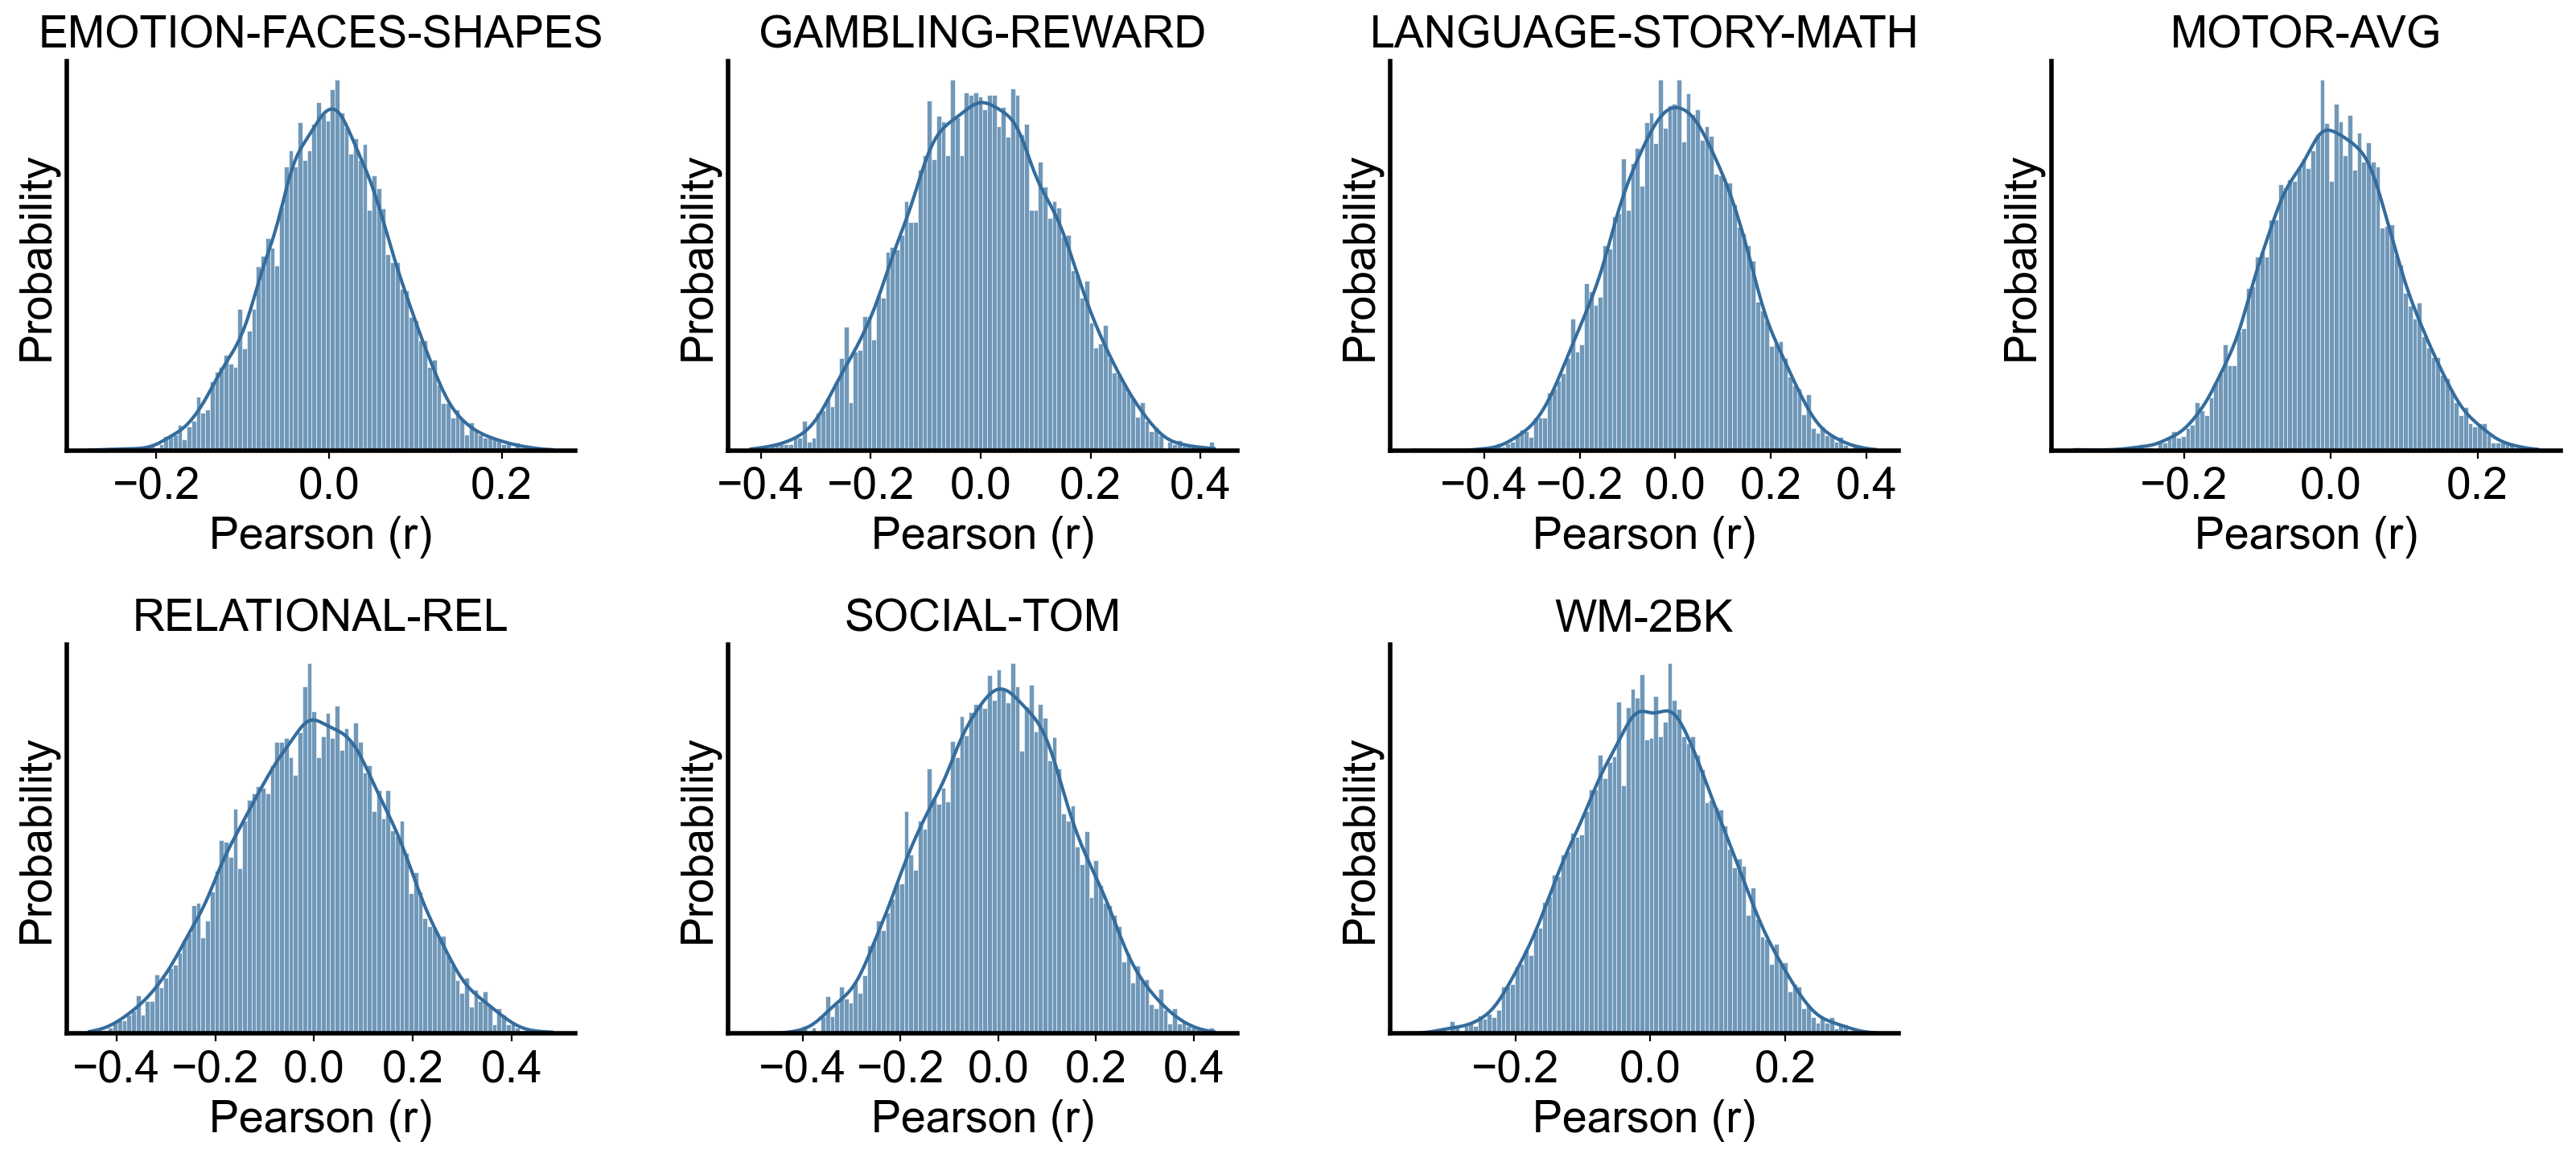

In [23]:
import seaborn as sns
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

fig = plt.figure(figsize=(20, 8), dpi=200)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

for i,task_name in enumerate(PlotName):
    r = np.load(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/corr4corr/{task_name}.npy')
    df = pd.DataFrame(r, columns = ['r'])

    if i ==0: ax = fig.add_subplot(241)
    if i ==1: ax = fig.add_subplot(242)
    if i ==2: ax = fig.add_subplot(243)
    if i ==3: ax = fig.add_subplot(244)
    if i ==4: ax = fig.add_subplot(245)
    if i ==5: ax = fig.add_subplot(246)
    if i ==6: ax = fig.add_subplot(247)
    ax = sns.histplot(data=df, 
                    x='r', 
                    bins=100, 
                    kde=True,
                    color='#346c9c', # '#FFD3D4', 
                    alpha=0.7, 
                    edgecolor="white")
    sns.despine(top=True, right=True)
    plt.yticks([])
    plt.xticks(fontsize=20)
    plt.ylabel('Probability', fontsize=20)
    plt.xlabel('Pearson (r)', fontsize=20)
    plt.title(task_name, fontsize=20)
    ax=plt.gca()
    x_major_locator=MultipleLocator(0.2)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
plt.show()

**Activation Area**

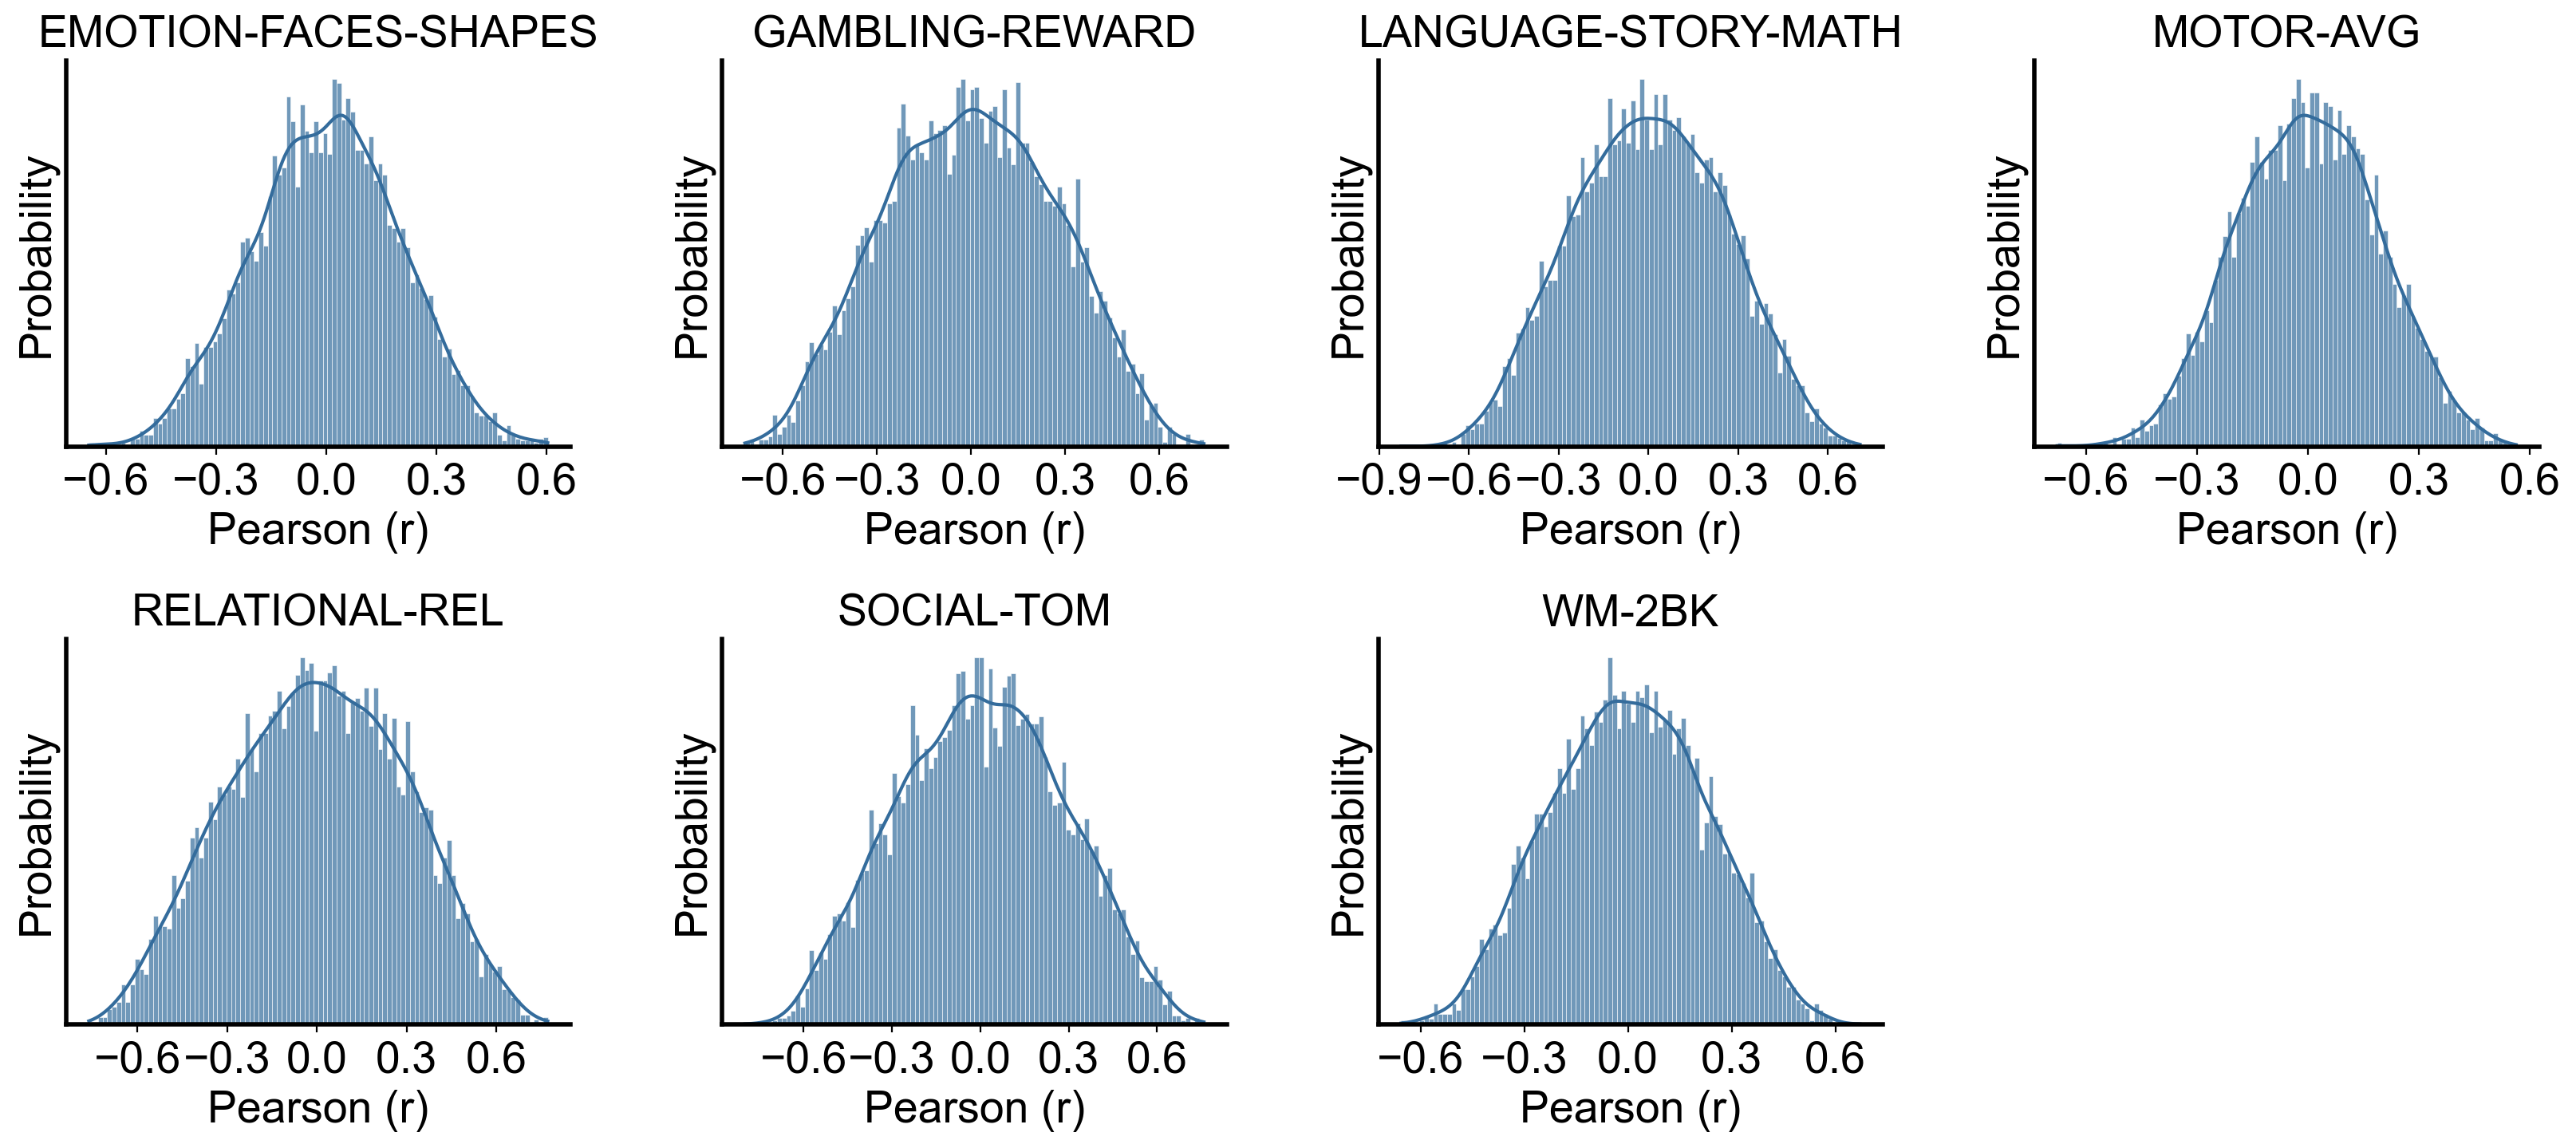

In [22]:
import seaborn as sns
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

fig = plt.figure(figsize=(20, 8), dpi=200)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

for i,task_name in enumerate(PlotName):
    r = np.load(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/corr4corr/{task_name}_new.npy')
    df = pd.DataFrame(r, columns = ['r'])

    if i ==0: ax = fig.add_subplot(241)
    if i ==1: ax = fig.add_subplot(242)
    if i ==2: ax = fig.add_subplot(243)
    if i ==3: ax = fig.add_subplot(244)
    if i ==4: ax = fig.add_subplot(245)
    if i ==5: ax = fig.add_subplot(246)
    if i ==6: ax = fig.add_subplot(247)
    ax = sns.histplot(data=df, 
                    x='r', 
                    bins=100, 
                    kde=True,
                    color='#346c9c', # '#FFD3D4', 
                    alpha=0.7, 
                    edgecolor="white")
    sns.despine(top=True, right=True)
    plt.yticks([])
    plt.xticks(fontsize=20)
    plt.ylabel('Probability', fontsize=20)
    plt.xlabel('Pearson (r)', fontsize=20)
    plt.title(task_name, fontsize=20)
    ax=plt.gca()
    x_major_locator=MultipleLocator(0.3)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
plt.show()

# Figure 5B.

LANGUAGE-STORY-MATH 77.53786542528539 0.0
LANGUAGE-STORY-MATH 41.73130052463295 0.0
LANGUAGE-STORY-MATH -58.018408796678 0.0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Neg Activation vs. No Activation: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.373e+07
No Activation vs. Pos Activation: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.404e+07
Neg Activation vs. Pos Activation: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.402e+06
RELATIONAL-REL 98.90881729548619 0.0
RELATIONAL-REL 85.26728231444963 0.0
RELATIONAL-REL -52.65173078759388 0.0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Neg Activation vs. No Activation: Mann-Whitney-Wilcoxon test tw

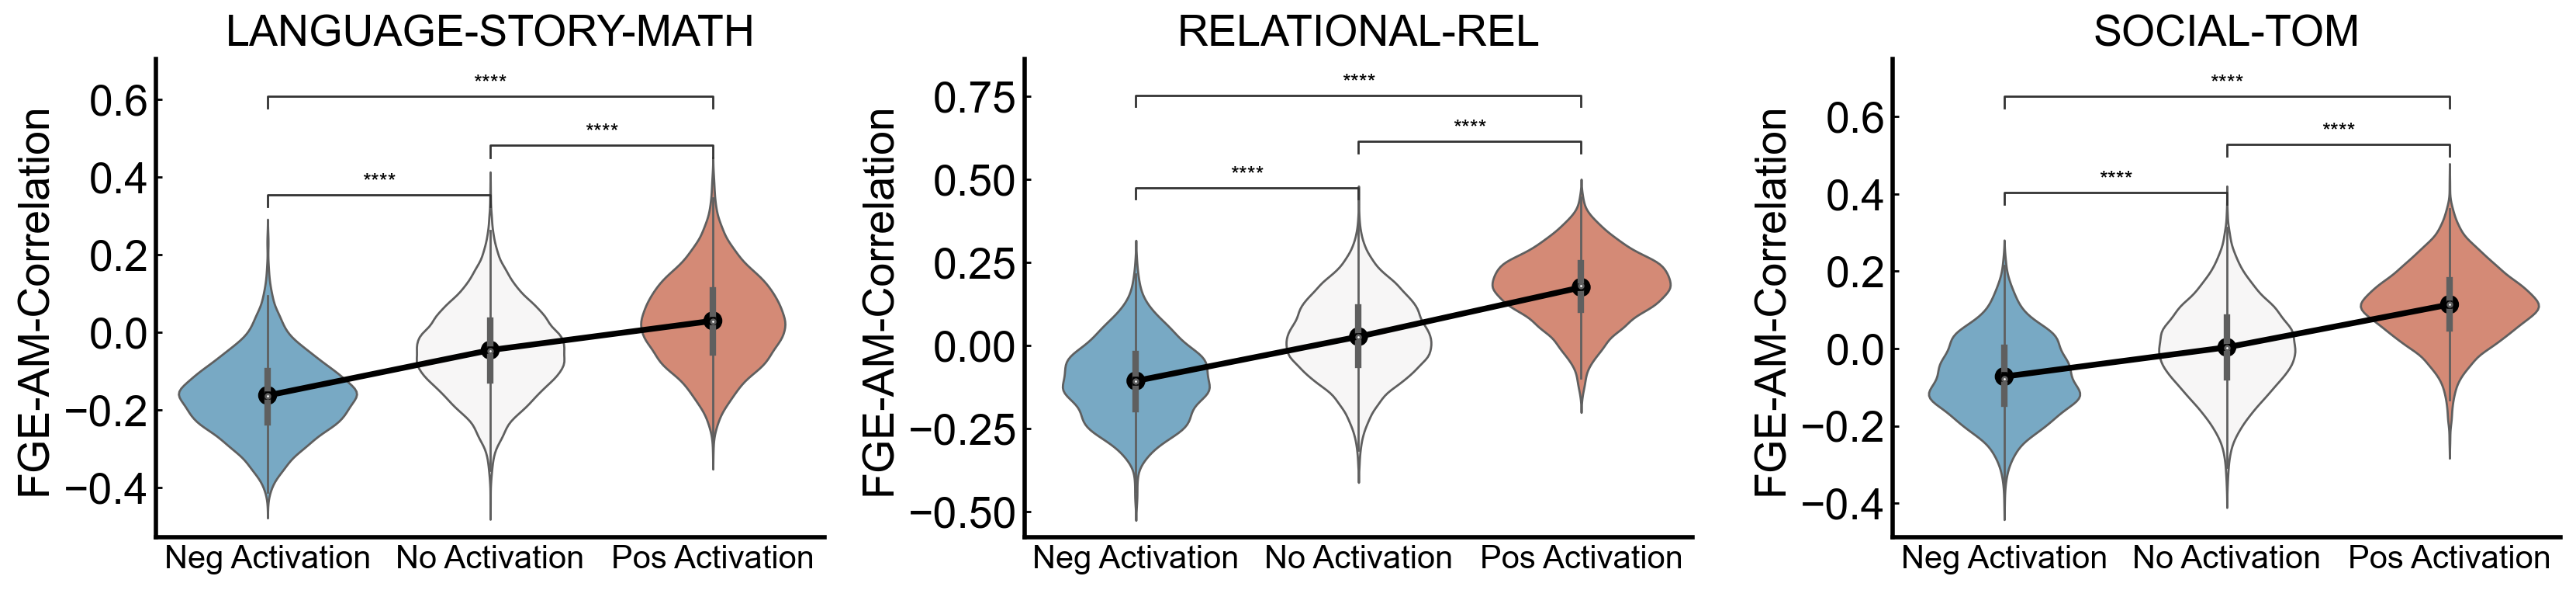

In [101]:
import statsmodels.stats.weightstats as st
from statannotations.Annotator import Annotator

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

def Activation_State(x):
    # x: (29696,)
    y = []
    for i in range(x.shape[0]):
        if x[i] > 0: y.append('Pos Activation')
        elif x[i] < 0: y.append('Neg Activation')
        elif x[i] == 0: y.append('No Activation')
    return y

PlotName = [
            'LANGUAGE-STORY-MATH',
            # 'MOTOR-T',
            'RELATIONAL-REL',
            'SOCIAL-TOM',            
            ]

fig = plt.figure(figsize=(20, 4), dpi=200)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

for pi,plottask in enumerate(PlotName):
    AM = np.load(f'/n01dat01/dyli/multi/results_data/AM_correlation_results_4mac/{plottask}/AM_WholeBrainThr.npy')
    TCOWBM = np.load(f'/n01dat01/dyli/multi/results_data/AM_correlation_results_4mac/{plottask}/TaskCorrelationOriWholeBrain_Max.npy')

    index_1_pos = (TCOWBM[AM>0])
    index_1_neg = (TCOWBM[AM<0])
    index_2 = (TCOWBM[AM==0])
    t,p_two,_ = st.ttest_ind(index_1_pos,index_1_neg,usevar='unequal')
    print(plottask, t, p_two)
    t,p_two,_ = st.ttest_ind(index_1_pos,index_2,usevar='unequal')
    print(plottask, t, p_two)
    t,p_two,_ = st.ttest_ind(index_1_neg,index_2,usevar='unequal')
    print(plottask, t, p_two)

    df = pd.DataFrame(columns=['TCOWBM', 'Activation state'])
    AM_binary = Activation_State(AM)
    for i in range(29696):
        df.loc[len(df.index)] = [TCOWBM[i], AM_binary[i]]

    # fig,ax = plt.subplots(figsize=(2,4),dpi=100,facecolor="w")
    if pi==0: ax = fig.add_subplot(131)
    if pi==1: ax = fig.add_subplot(132)
    if pi==2: ax = fig.add_subplot(133)
    ax = sns.violinplot(x="Activation state",y="TCOWBM",
                    data=df,
                    order = ['Neg Activation', 'No Activation', 'Pos Activation'],
                    palette='RdBu_r',
                    estimator=np.mean,
                    ci="sd", 
                    capsize=.1,
                    errwidth=1,
                    errcolor="k",
                    ax=ax,
                    **{"edgecolor":"k","linewidth":1})

    pairs=[("Neg Activation", "Pos Activation"), ("Neg Activation", "No Activation"), ("Pos Activation", "No Activation")]
    annotator = Annotator(ax, pairs, 
                            data=df, 
                            order = ['Neg Activation', 'No Activation', 'Pos Activation'],
                            x='Activation state', y='TCOWBM',)
    annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
    annotator.apply_and_annotate()

    ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=14,bottom=False)
    for spine in ["top","right"]:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    # ax.grid(axis='y',ls='--',c='gray')
    ax.set_axisbelow(True)

    sns.pointplot(x='Activation state', y='TCOWBM',
                data=df,
                # palette = 'hls',
                color = 'black',
                order = ['Neg Activation', 'No Activation', 'Pos Activation'],
                dodge = True,
                join = True,
                markers=["o", "x"],
                linestyles=["-", "--"])

    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(fontsize=20)
    plt.ylabel('FGE-AM-Correlation', fontsize=20)
    plt.xlabel('', fontsize=20)
    plt.title(plottask, fontsize=20)
plt.show()

In [9]:
PlotName = ['LANGUAGE-STORY-MATH', 'RELATIONAL-REL', 'SOCIAL-TOM']

(100, 7164)
(29696, 7164)
LANGUAGE-STORY-MATH (18768, 3434) 0.5542074273023512 T_PREC mode 51
neg:  9785
(-0.32207614709336885, 0.0010838530662540674)
pos:  18768
(0.5542074273023512, 2.2064192259229632e-09)
(29696, 7164)
RELATIONAL-REL (12466, 158) 0.5406703619939897 AF mode 158
neg:  26486
(-0.3762389005463455, 0.00011439335594240508)
pos:  12466
(0.5406703619939897, 6.371013266523705e-09)
(29696, 7164)
SOCIAL-TOM (9058, 4560) 0.5765125921037252 ST_PREF mode 182
neg:  24987
(-0.2901713025492243, 0.00340584625514566)
pos:  9058
(0.5765125921037252, 3.4549183361155456e-10)


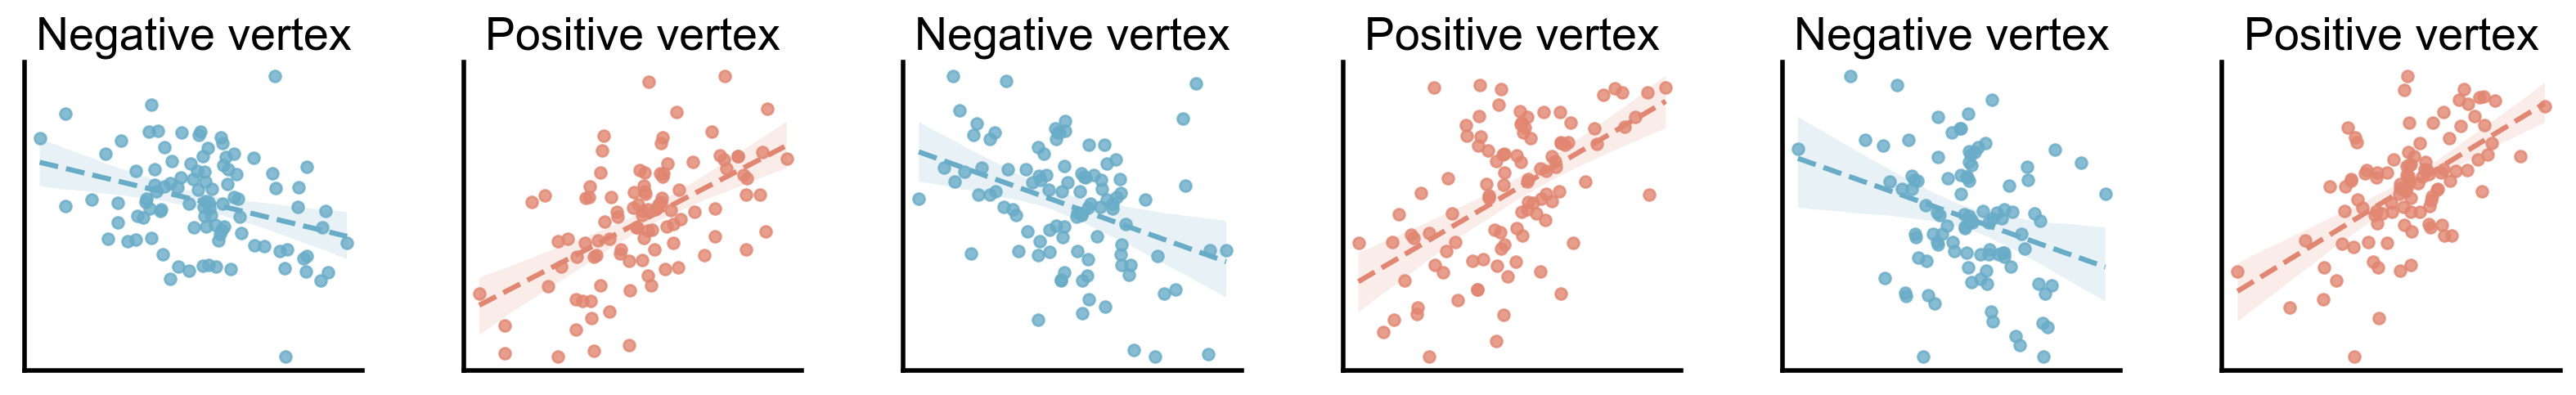

In [35]:
fig = plt.figure(figsize=(20, 2.5), dpi=200)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)

para = np.zeros((100, 7164))
for subi,sub in enumerate(namelist):
    # para[subi,:] = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction/data4plotting/FGE4PredictAM/{sub}_FlattenFGE.txt')
    para[subi, :] = np.load(f'/n01dat01/dyli/multi/HCP_1200/{sub}/FP_{sub}_predict_by_200_group_whitemode_deve-mode_para_L.npy')[1:, new_fiber_idx].flatten()
print(para.shape)

for i,task_name in enumerate(PlotName):
    # load the data
    AM = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_expression/y_{TaskList[TaskName.index(task_name)]}_thrGAMMA.txt')
    task_expression_ori = np.loadtxt(f'/n01dat01/dyli/multi/results_data/AM_prediction_correlation/correlation_{TaskList[TaskName.index(task_name)]}.txt') # (29696, 7164)
    assert ~np.isnan(task_expression_ori).any()
    print(task_expression_ori.shape)

    # find the max correlation from 29696*7164
    idx = np.unravel_index(task_expression_ori.argmax(), task_expression_ori.shape)
    print(task_name, idx, task_expression_ori[idx[0], idx[1]], label_name_lm[int(idx[1]//199)], 'mode', idx[1]%199)
    x = para[:, idx[1]]
    task_expression_ori_FGE = np.squeeze(task_expression_ori[:, idx[1]])

    # find the max related vertex
    y = AM[:, np.argmin(task_expression_ori_FGE)]
    print('neg: ', np.argmin(task_expression_ori_FGE))
    print(pearsonr(x,y))

    if i==0: ax = fig.add_subplot(161)
    if i==1: ax = fig.add_subplot(163)
    if i==2: ax = fig.add_subplot(165)
    # plotting
    tips = pd.DataFrame({'y':y, 'x':x})
    fig = sns.regplot(x="x", y="y", \
                data=tips, \
                scatter_kws={'s':100}, \
                line_kws={'linestyle':'--'}, \
                marker='.', color='#69ACC7')
    plt.xlabel(f"", fontsize=20)
    plt.ylabel(f"", fontsize=20)
    # change the x ticks
    # x_major_locator = MultipleLocator(25)
    # ax.xaxis.set_major_locator(x_major_locator)
    plt.xticks([])
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
    ax.tick_params(labelsize=15)
    fig = fig.get_figure()
    plt.title('Negative vertex', fontsize=20)

    # find the max related vertex
    y = AM[:, np.argmax(task_expression_ori_FGE)]
    print('pos: ', np.argmax(task_expression_ori_FGE))
    print(pearsonr(x,y))

    if i==0: ax = fig.add_subplot(162)
    if i==1: ax = fig.add_subplot(164)
    if i==2: ax = fig.add_subplot(166)
    # plotting
    tips = pd.DataFrame({'y':y, 'x':x})
    fig = sns.regplot(x="x", y="y", \
                data=tips, \
                scatter_kws={'s':100}, \
                line_kws={'linestyle':'--'}, \
                marker='.', color='#E18671')
    plt.xlabel(f"", fontsize=20)
    plt.ylabel(f"", fontsize=20)
    # change the x ticks
    # x_major_locator = MultipleLocator(25)
    # ax.xaxis.set_major_locator(x_major_locator)
    plt.xticks([])
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth('2.0')
    ax.spines['left'].set_linewidth('2.0')
    ax.tick_params(labelsize=15)
    fig = fig.get_figure()
    plt.title('Positive vertex', fontsize=20)

plt.show()